## Data Importation 

In [1]:
data<-read.csv("data_visco.csv")
data_lasso <- read.csv("data_lasso.csv")
data_AIC <- read.csv("data_AIC.csv")


In [2]:
dim(data_lasso)
dim(data_AIC)

[1] 6987   30

[1] 7246   20

In [2]:
nettoyer = function(x){
    x[x < 0] = 0
    return(x)
}

In [3]:
data_lasso = nettoyer(data_lasso)

In [2]:
data_lasso_log = data.frame(data_lasso)
vis_log = log(data_lasso_log[1])
data_lasso_log[,1] = vis_log
data[,1] = vis_log

In [6]:
dim(data_lasso_log)

[1] 6987   30

Pour rendre la distribution de la viscocité gaussienne, on utilise log(viscocité)

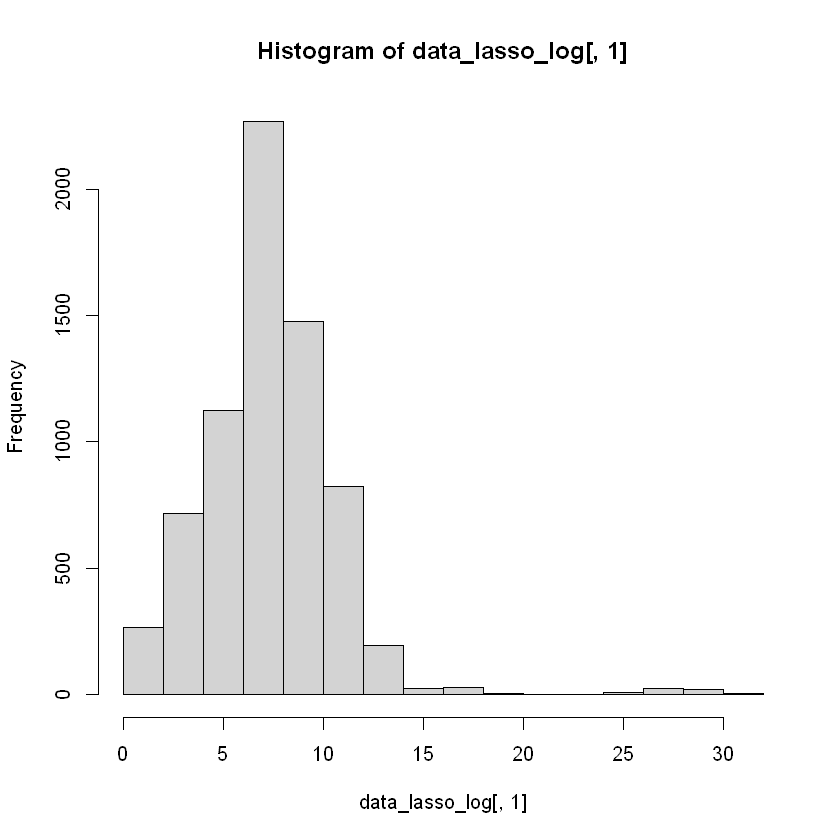

In [7]:
hist(data_lasso_log[,1])

In [8]:
data_lasso_log

vis,X__3,X__4,X__8,X__10,X__17,X__18,X__29,X__30,X__43,...,X__84,X__86,X__106,X__109,X__113,X__115,X__117,X__133,X__138,autres
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.795647,0,9.42,8.52,0,0,0.00,0.00,0,0,...,0,0,0,68.39,0,0.00,0,0,0.00,0.00000
8.396832,0,9.42,8.53,0,0,0.00,0.00,0,0,...,0,0,0,70.32,0,0.00,0,0,0.00,0.00000
3.218876,0,3.58,14.25,0,0,1.88,0.00,0,0,...,0,0,0,45.42,0,0.00,0,0,1.34,15.80000
3.044522,0,3.81,14.08,0,0,3.30,0.09,0,0,...,0,0,0,45.55,0,0.08,0,0,1.24,16.88000
4.158883,0,0.00,0.00,0,0,0.00,0.00,0,0,...,0,0,0,66.51,0,0.00,0,0,0.00,0.01000
4.369448,0,3.00,18.00,0,0,2.00,0.00,0,0,...,0,0,0,56.00,0,0.00,0,0,2.00,6.00000
8.676587,0,9.43,8.53,0,0,0.00,0.00,0,0,...,0,0,0,71.50,0,0.00,0,0,0.00,0.00000
6.852243,0,0.00,0.00,0,0,10.60,0.00,0,0,...,0,0,0,74.85,0,0.00,0,0,0.00,0.15000
5.568345,0,0.00,0.00,0,0,0.00,0.00,0,0,...,0,0,0,70.37,0,0.00,0,0,0.00,0.00000


## t-IMSE standard

In [3]:
# Charger la librairie
library("KrigInv") #Pour t-IMSE
library("nloptr") #Pour la fonction d'optimisation Cobyla

Warning message:
"package 'KrigInv' was built under R version 4.0.5"
Loading required package: DiceKriging

Warning message:
"package 'DiceKriging' was built under R version 4.0.5"
Warning message:
"package 'nloptr' was built under R version 4.0.4"


In [4]:
#t-IMSE STANDARD APPLIQUEE AUX DONNEES 

x = data[1:60,2:116]
data_reduced = data[1:120,1:116]
#des = data_reduced[c(-1)]
shape = c(dim(data_reduced[,c(-1)]))
noise = matrix(runif(prod(shape),min = 0.00000001,max = 0.00000002), nrow = 120)
mod = km(formula = ~1, design = data_reduced[,c(-1)] + noise, response = data_reduced[1])
tmse_optim(x, model = mod, T = log(400))
# lowerbound = as.vector(rep(0, dim(data_reduced[, -1])[2]))
# upperbound = as.vector(rep(100, dim(data_reduced[, -1])[2]))
# max_infill_criterion(lower=lowerbound, upper = upperbound, method="tmse", model=mod, T=(400))$par


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  0.78 1.966238e-08 44.86 1.985377e-08 1.9

[1] 0.1912995 0.1912995 0.1912995 0.1912995 0.1912995 0.1912995 0.1912995
 [8] 0.1912995 0.1912995 0.1912995 0.1912995 0.1912995 0.1912995 0.1912995
[15] 0.1912995 0.1912995 0.1912995 0.1912995 0.1912995 0.1912995 0.1912995
[22] 0.1912995 0.1912995 0.1912995 0.1912995 0.1912995 0.1912995 0.1912995
[29] 0.1912995 0.1912995 0.1912995 0.1912995 0.1912995 0.1912995 0.1912995
[36] 0.1912995 0.1912995 0.1912995 0.1912995 0.1912995 0.1912995 0.1912995
[43] 0.1912995 0.1912995 0.1912995 0.1912995 0.1912995 0.1912995 0.1912995
[50] 0.1912995 0.1912995 0.1912995 0.1912995 0.1912995 0.1912995 0.1912995
[57] 0.1912995 0.1912995 0.1912995 0.1912995

In [5]:
x0=as.numeric(data[116,2:116])
fn<-function(x){
  tmse_optim(x, model = mod, T = log(400))
}
contr<-function(x){
  h<-numeric(4)
  h[1]<-sum(x)-100 #g(x)>=0
  h[2]<-(-sum(x))+100  # g(x) <= 0 <=> -g(x)>=0
  h[3]<-x
  h[4]<-(-x)+100
  return(h)
}

options(warn=-1)
cobyla(x0,fn,hin=contr)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



$par
  [1]  1.9699614076  1.1340110980  0.0529969444 -0.0005761588  0.0401266543
  [6]  0.0597797204 -0.0005946712 -0.0005946712  0.0522019977 -0.0006043480
 [11] -0.0317812703 -0.0338826980 -0.0005925279 -0.0250561700 -0.0005880399
 [16]  0.0287349055  0.0574245211 -0.0006040707  0.0543744047 -0.0006141660
 [21] -0.0006141660 -0.0006141660 -0.0006141660 -0.0273648697  0.0301374184
 [26]  0.0298302373  0.0433948462  0.0433796398 -0.0006366873  0.0417074480
 [31] -0.0006444783  0.0223598722 -0.0263781977  0.0393561990 -0.0006513410
 [36]  0.0429159716 -0.0006593660  0.0440102309  0.0242461941  0.0370935424
 [41]  0.0391446544 -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922
 [46] -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922
 [51] -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922
 [56] -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922
 [61] -0.0006864922 -0.0006864922 35.7848665671 -0.0006864922 -0.0006864922
 [66] -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922
 [71] -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922
 [76] -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922
 [81] -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922
 [86] -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922 60.5310391932
 [91] -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922
 [96] -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922
[101] -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922
[106] -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922
[111] -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922 -0.0006864922

$value
[1] 0.1912995

$iter
[1] 1000

$convergence
[1] 5

$message
[1] "NLOPT_MAXEVAL_REACHED: Optimization stopped because maxeval (above) was reached."

## Adaptation t-IMSE à nos contraintes

Au lieu d'utiliser la fonction **tmse_optim** standard, il nous faut considerer les contraintes du simplex

In [6]:
# Initialize randomly data by index
d = 29 #Nombre de variables gardées par Lasso
n_init = d*10
index = sample(1:nrow(data_lasso_log),n_init)
data_lasso_reduced = data_lasso_log[index, ] #Prendre aleatoirement n_init observations

X = data_lasso_reduced[,c(-1)]

In [4]:
#simulation de x unifome sur [0,1] et la somme egale à 1
simul <- function(d)
{
  # set.seed(18)
  u = runif(n=d-1, min=0,max=1)
  u = c(0,u,1)
  u = sort(u)
  x = u[2:(d+1)] - u[1:d]  
  return(x)
}

In [5]:
#Fonction pour calculer l'integrale de t-IMSE

g = function (x, model, T, method.param = NULL) 
{
    y <- t(x)
    if (ncol(y) == model@d) 
        z <- y
    if (ncol(y) != model@d) 
        z <- x
    krig <- predict_nobias_km(object = model, newdata = as.data.frame(z), 
        type = "UK", se.compute = TRUE)
    mk <- krig$mean
    sk <- krig$sd
    if (is.null(method.param)) 
        method.param <- 0
    epsilon <- method.param
    if (length(T) == 1) {
        W <- 1/sqrt(2 * pi * (sk^2 + epsilon^2)) * exp(-0.5 * 
            ((mk - T)/sqrt(sk^2 + epsilon^2))^2)
    }
    else {
        W0 <- 1/sqrt(2 * pi * (sk^2 + epsilon^2))
        W <- 0
        for (i in 1:length(T)) {
            Ti <- T[i]
            W <- W + W0 * exp(-0.5 * ((mk - Ti)/sqrt(sk^2 + epsilon^2))^2)
        }
    }
    g <- W * sk^2
    return(g)
}

In [6]:
#Fonction pour calculer l'integrale de t-IMSE du modele mis à jour
g_new = function (x, m0, model, T, method.param = NULL) 
{
    y <- t(x)
    if (ncol(y) == model@d) 
        z <- y
    if (ncol(y) != model@d) 
        z <- x
    krig0 <- predict_nobias_km(object = m0, newdata = as.data.frame(z), 
        type = "UK", se.compute = TRUE)
    krig <- predict_nobias_km(object = model, newdata = as.data.frame(z), 
        type = "UK", se.compute = TRUE)
    mk0 <- krig0$mean
    sk0 <- krig0$sd
    if (is.null(method.param)) 
        method.param <- 0
    epsilon <- method.param
    if (length(T) == 1) {
        W <- 1/sqrt(2 * pi * (sk0^2 + epsilon^2)) * exp(-0.5 * 
            ((mk0 - T)/sqrt(sk0^2 + epsilon^2))^2)
    }
    else {
        W0 <- 1/sqrt(2 * pi * (sk0^2 + epsilon^2))
        W <- 0
        for (i in 1:length(T)) {
            Ti <- T[i]
            W <- W + W0 * exp(-0.5 * ((mk0 - Ti)/sqrt(sk0^2 + epsilon^2))^2)
        }
    }
    sk <- krig$sd
    g <- W * sk^2
    return(g)
}

In [7]:
#Calculer t-IMSE adapté par la methode de Monte Carlo
tmse <- function(d,mod, T)
{
    s = 0
    for(i in 1:1000){
    x = simul(d) 
    s = s + g(x, model = mod,T)
    }
    tmse = s/1000
    return(tmse)
}
    

In [29]:
#Pour comparer avec la methode de Monte Carlo

#Calculer les resultats par t-IMSE standard
s = 0

shape = c(dim(data_lasso_reduced[,c(-1)]))
noise = matrix(runif(prod(shape),min = 0.000001,max = 0.000002), nrow = n_init)
mod = km(formula = ~1, design = data_lasso_reduced[,c(-1)]+noise, response = data_lasso_reduced[,1])
x = data_lasso_reduced[1:50,c(-1)]
tmse_optim(x, model = mod, T = log(400))



optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.98709e-06 59.68 44.58 97.82 41.86 94 21.72 0.02000277 89.62 1.989396e-06 79.86 2.080001 88.9 20.6 43.56 33.16 20 1.995482e-06 91.52 1.992148e-06 18.42 1.97895e-06 159.36 2.000001 3.12 59.82 4.000002 30.08 125.04 
  - best initial criterion value(s) :  -574.7981 

N = 29, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        574.8  |proj g|=       8.1584
At iterate     1  f =       474.23  |proj g|=        2.2322
At iterate     2  f =        474.2  |proj g|=        2.2298
At iterate     3  f =

[1] 1.1400643 1.2686734 1.2782903 1.2298219 1.1160626 1.2133782 1.3555167
 [8] 1.3519476 1.2425972 1.2496750 1.1804115 1.0187640 1.2427226 1.2539713
[15] 0.9846226 0.9056751 1.0653038 1.1131766 1.1161188 1.3236518 1.0385615
[22] 1.2357331 1.1185130 0.9611277 1.0538750 1.1426962 1.1123400 1.0463891
[29] 1.0959879 0.9764759 1.0579605 1.3479970 1.1989976 1.2717149 1.0569911
[36] 1.1318047 1.1067791 1.0634386 1.1193857 1.3211769 1.1326618 0.9479519
[43] 1.0733935 0.9552678 1.3384330 1.2660167 1.2642168 1.0895564 1.1292112
[50] 0.3712356

In [12]:
#Resultats par la methode Monte Carlo 
mod = km(formula = ~1, design = data_lasso_reduced[,c(-1)] + noise, response = data_lasso_reduced[,1])
print(tmse(d = 29, mod, T = log(400)))


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.976771e-08 76.64 53.3 90 19.1 83 1.112876 0.51714 120.92 26.8 65.02 1.16 105.1 28 35.12 43.46 30 1.983494e-08 101.54 1.99864e-08 14.8 1.982789e-08 158.16 2 1.42 39.6 6.78 42.58 155.52 
  - best initial criterion value(s) :  -582.3132 

N = 29, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       582.31  |proj g|=       7.6017
At iterate     1  f =        561.1  |proj g|=        8.9693
At iterate     2  f =       552.57  |proj g|=        9.1913
At iterate     3  f =        550.7  |proj g|=    

### Optimisation

In [14]:
#Modele initial
m0 = km(formula = ~1, design = data_lasso_reduced[,c(-1)] + noise, response = data_lasso_reduced[,1])


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.976771e-08 76.64 53.3 90 19.1 83 1.112876 0.51714 120.92 26.8 65.02 1.16 105.1 28 35.12 43.46 30 1.983494e-08 101.54 1.99864e-08 14.8 1.982789e-08 158.16 2 1.42 39.6 6.78 42.58 155.52 
  - best initial criterion value(s) :  -515.217 

N = 29, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       515.22  |proj g|=      0.78842
At iterate     1  f =       503.19  |proj g|=        1.2847
At iterate     2  f =       499.84  |proj g|=        1.2847
At iterate     3  f =       499.81  |proj g|=     

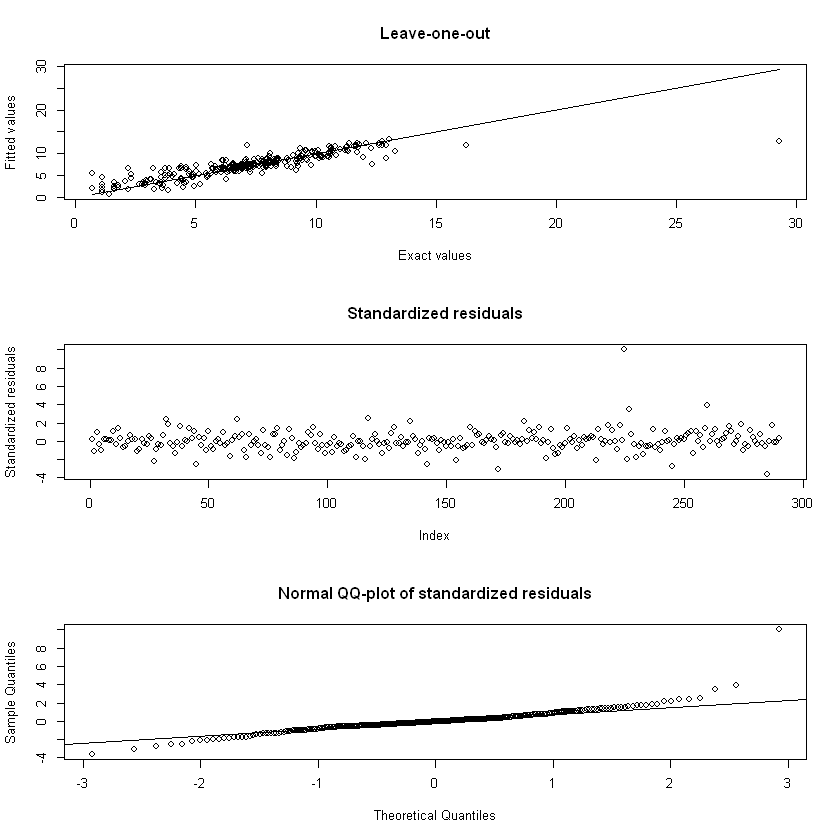

In [15]:
plot(mod)

In [19]:
#TROUVER LE POINT LE PLUS PROCHE D'UN NOUVEAU POINT

#input: nouveau point: 'x_new' ; donnees dans lesquelles on cherche: 'data'
#output: la valeur y du point le plus proche


# pointProche <- function(x_new, data){
#     X_cher = data[,c(-1)]
#     sub = do.call(rbind, apply(X_cher, 1, function(x){return(x - x_new)}))
#     norms = apply(sub, 1, function(x){return(norm(as.numeric(x), type = "2"))})
#     argmin = which.min(norms)
#     return (data[argmin,])
# }

pointProche <- function(x_new, data){
    X_cher = data[,c(-1)]
    argmin = 1
    minvalue = norm(x_new- X_cher[1,], type = "2") 
    n_points = nrow(data) #longeur da la base de données

    for (i in 2:n_points){
        mse = norm(x_new- X_cher[i,], type = "2")
        
        if (mse < minvalue){
            minvalue = mse 
            argmin = i
        }
    }
    
    return (data[argmin,])
}

In [143]:
pointProche(X[1,],data_recherche)

,vis,X__3,X__4,X__8,X__10,X__17,X__18,X__29,X__30,X__43,...,X__84,X__86,X__106,X__109,X__113,X__115,X__117,X__133,X__138,autres
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3337,7.713785,0,14.7,0,0,0,15.9,0,0,0,...,0,0,0,55.5,0,0.1,0,0,0,4.8


In [139]:

new_tmse = function(x_new){
    # d: dimension, d = 29
    data = data_updated
    d = 29
    niter = 1000
    s = 0
    data_recherche = data_lasso_log[setdiff(1:nrow(data_lasso_log),index),]
    print(dim(data_recherche))
    
    newpoint = pointProche(x_new, data_recherche)
    
    data_new = data.frame(data)
    data_new[nrow(data_new) + 1, ] = newpoint
    noise = matrix(runif(prod(dim(data_new[,c(-1)])),min = 0.0001,max = 0.0002), nrow = nrow(data_new))
    #mod = km(formula = ~1, design = data_new + noise, response = data_new[1],)
    mod = update(m0, newX = data_new[,c(-1)]+noise, newy = data_new[,1],newX.alreadyExist = FALSE, cov.reestim = FALSE, trend.reestim = FALSE)
    for(i in 1:niter){
        x = simul(d)
        s = s + g_new(x, m0 = m0, model = mod, T = log(400))
    }
    tmse = s/niter
    return(tmse)    
}

In [140]:
data_lasso[1,c(-1)]
new_tmse(data_lasso[1,c(-1)])

,X__3,X__4,X__8,X__10,X__17,X__18,X__29,X__30,X__43,X__46,...,X__84,X__86,X__106,X__109,X__113,X__115,X__117,X__133,X__138,autres
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,9.42,8.52,0,0,0,0,0,0,0,...,0,0,0,68.39,0,0,0,0,0,0


[1] 6697   30


[1] 1.222485

In [128]:
contraintes = function(x){
  n = length(x)
  h<-numeric(n+2)
  h[1]<- 100 - sum(x) #somme = 1
  h[2]<- sum(x) - 100
  #h[3:n+2] = as.numeric(x)
  for (i in range(3,n+2)){
    h[i] = x[i-2]
  }
  return(h)
}

In [145]:
# OPTIMISATION TMSE PROCESS USING COBYLA

# Some parameters
d = 29  # data dimension
n_init = 10*d   # initial number of data points
n_points = nrow(data_lasso) # total number of data points
n_adds = 10 # number of additional data points



print("Starting...")
# Loop over additional data points
for (i in 1:n_adds){

    print("Adding point... ")
    data_recherche = data_lasso_log[setdiff(1:nrow(data_lasso),index),]
    x_new = cobyla(x0 = as.numeric(X[i,]), fn = new_tmse, hin = contraintes, control = list(xtol_rel = 1e-3))$par
    newpoint = pointProche(x_new,data_recherche)
    print(newpoint)
    data_updated[nrow(data_updated) + 1, ] = newpoint
    #data_updated = rbind(data_updated,newpoint)
    X = data_updated[,c(-1)]
}

[1] "Starting..."
[1] "Adding point... "


For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 66

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 66

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 66

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 66

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 66

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 66

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 66

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 66

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 6697   30
[1] 66

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [ ]:
X 

,X__3,X__4,X__8,X__10,X__17,X__18,X__29,X__30,X__43,X__48,...,X__84,X__86,X__106,X__109,X__113,X__115,X__117,X__133,X__138,autres
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4278,0,2.300000,0.000000,9.50,0,0.0000000,0.0000000,0.0000000,0.00,0.00,...,0,0.1000000,0,61.10000,0.0000000,0.0000000,8.70000,0.0000000,1.80000,1.30000
1862,0,0.000000,0.000000,0.00,0,0.0000000,0.0000000,0.0000000,0.00,0.00,...,0,0.0000000,0,75.25000,0.0000000,0.0000000,0.00000,0.0000000,0.00000,0.02000
5016,0,9.600000,0.000000,3.00,0,7.9000000,0.0000000,0.0000000,0.00,0.00,...,0,0.0000000,0,62.11000,0.0000000,0.2000000,2.00000,0.0000000,1.50000,0.11000
6393,0,23.600000,5.400000,0.00,0,4.3000000,0.0000000,0.0000000,0.00,0.00,...,0,0.0000000,0,55.70000,0.0000000,0.0000000,0.00000,0.0000000,0.00000,0.01000
3001,0,15.130000,0.000000,0.00,0,9.2700000,0.0000000,0.0000000,5.15,0.00,...,0,0.1200000,0,51.97000,0.0000000,0.0000000,0.00000,0.0000000,0.00000,5.39000
2157,0,11.020000,0.000000,1.97,0,17.3100000,0.0000000,0.0000000,23.90,0.00,...,0,0.0000000,0,45.21000,0.0000000,0.0000000,0.00000,0.0000000,0.00000,0.59000
1822,0,5.980000,6.280000,4.98,0,0.0000000,0.0000000,0.0000000,0.00,0.00,...,0,0.0000000,0,68.49000,0.0000000,0.0000000,0.00000,0.0000000,0.00000,9.29000
3993,0,0.000000,0.000000,0.00,0,1.6000000,0.0000000,0.0000000,0.00,0.00,...,0,0.0000000,0,69.00000,0.0000000,0.0000000,0.00000,0.0000000,4.00000,0.00000
4839,0,2.500000,2.800000,0.60,0,6.4000000,0.0000000,0.0000000,0.00,0.00,...,0,0.0000000,0,61.16000,0.0000000,0.2000000,3.10000,0.0000000,0.60000,0.13000


In [ ]:
sum(X[300,])

[1] 1027.017

### Tester la fonction jouet

In [12]:
fjouet<-function(x1, x2){
    return((x1-50)**2+(x2-50)**2)}

In [13]:
d = 2
N = 10*d

x <- runif(n=100, min=0, max=100)
y <- 100-x


donne <- cbind(x,y)
resp<- fjouet(donne[,1], donne[,2])
mat.donne<-as.data.frame(cbind(resp, donne))

mat.donne


resp,x,y
<dbl>,<dbl>,<dbl>
1868.177874,80.56287,19.437131
390.943609,63.98112,36.018877
188.328631,59.70383,40.296170
4139.973329,95.49711,4.502894
145.912158,58.54143,41.458567
1276.091801,75.25957,24.740430
496.443593,34.24494,65.755056
3695.500355,92.98546,7.014535
2021.265020,18.20955,81.790447


In [14]:
noise = matrix(runif(prod(dim(mat.donne[,c(-1)])),min = 0.1,max = 0.2), nrow = nrow(mat.donne))
m0 = km(formula = ~1, design = as.data.frame(mat.donne[,-1]+noise), response = as.data.frame(mat.donne[,1]))



optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 
  - parameters upper bounds :  196.5822 196.5428 
  - best initial criterion value(s) :  -563.6667 

N = 2, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       563.67  |proj g|=       3.5484
At iterate     1  f =       559.52  |proj g|=        1.6297
At iterate     2  f =        559.1  |proj g|=       0.44837
At iterate     3  f =       559.03  |proj g|=       0.44912
At iterate     4  f =       558.61  |proj g|=        1.4077
At iterate     5  f =       557.77  |proj g|=        3.0469
At iterate     6  f =       556.79  |proj g|=        3.9813
At iterate     7  f =       555.92  |proj g|=        1.6676
At iterate     8  f =       555.62  |proj g|=       0.64384
At iterate     9  f 

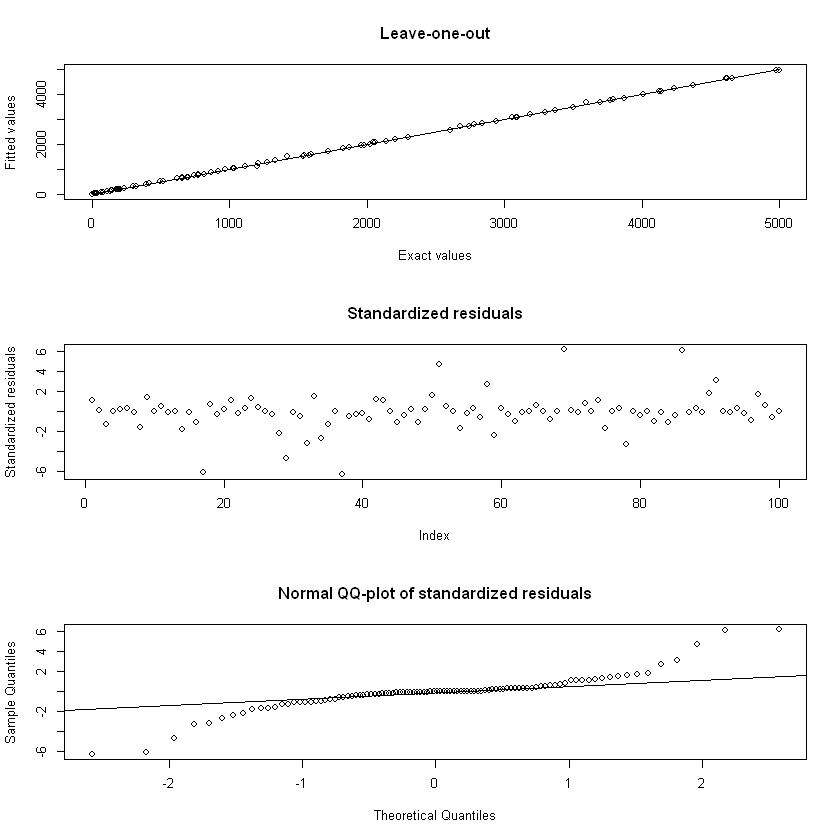

In [15]:
plot(m0)

In [23]:

new_tmse = function(x_new){
    # d: dimension, d = 29
    data = data_updated
    d = 2
    niter = 1000
    s = 0
    data_recherche = data_updated 
    
    newpoint = pointProche(x_new, data_recherche)
    
    data_new = data.frame(data)
    data_new[nrow(data_new) + 1, ] = newpoint
    noise = matrix(runif(prod(dim(data_new[,c(-1)])),min = 0.1,max = 0.2), nrow = nrow(data_new))
    mod = km(formula = ~1, design = data_new[,c(-1)]+noise , response = data_new[1],)
    #mod = update(m0, newX = data_new[,c(-1)]+noise, newy = data_new[,1],newX.alreadyExist = FALSE, cov.reestim = FALSE, trend.reestim = FALSE)
    for(i in 1:niter){
        x = simul(d)
        s = s + g_new(x, m0 = m0, model = mod, T =500)
    }
    tmse = s/niter
    return(tmse)    
}

In [17]:
contraintes = function(x){
  n = length(x)
  h<-numeric(n+2)
  h[1]<- 100 - sum(x) #somme = 1
  h[2]<- sum(x) - 100
  #h[3:n+2] = as.numeric(x)
  for (i in range(3,n+2)){
    h[i] = x[i-2]
  }
  return(h)
}

In [24]:
# OPTIMISATION TMSE PROCESS USING COBYLA

# Some parameters
d = 2  # data dimension
n_init = d*10   # initial number of data points
n_points = nrow(mat.donne) # total number of data points
n_adds = 5 # number of additional data points

# Initialize randomly data by index
index = sample(1:nrow(mat.donne),n_init)
data_updated =mat.donne[index, ]
X = data_updated[,c(-1)]

points_test = matrix(nrow = n_adds, ncol =2)

print("Starting...")
# Loop over additional data points
for (i in 1:n_adds){

    print("Adding point... ")
    data_recherche = mat.donne[setdiff(1:nrow(mat.donne),index),]
    x_new = cobyla(x0 = as.numeric(mat.donne[1,c(-1)]), fn = new_tmse, hin = contraintes, control = list(xtol_rel = 1e-3))$par
    print(x_new)
    points_test[i,] = x_new
    newpoint = pointProche(x_new,data_recherche)
    data_updated[nrow(data_updated) + 1, ] = newpoint
    #data_updated = rbind(data_updated,newpoint)
    X = data_updated[,c(-1)]
}

[1] "Starting..."
[1] "Adding point... "


For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 
  - parameters upper bounds :  179.5214 179.5961 
  - best initial criterion value(s) :  -128.3304 

N = 2, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       128.33  |proj g|=     0.070021
At iterate     1  f =       128.33  |proj g|=      0.069804
At iterate     2  f =       127.94  |proj g|=      0.018058
At iterate     3  f =        127.9  |proj g|=       0.02308
At iterate     4  f =       127.86  |proj g|=      0.011536
At iterate     5  f =       127.84  |proj g|=     0.0017995
At iterate     6  f =       127.84  |proj g|=    0.00029895
At iterate     7  f =       127.84  |proj g|=    1.0379e-05
At iterate     8  f =       127.84  |proj g|=    1.0198e-05

iterations 8
functi

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 
  - parameters upper bounds :  179.5702 179.481 
  - best initial criterion value(s) :  -146.12 

N = 2, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       146.12  |proj g|=     0.046039
At iterate     1  f =       146.12  |proj g|=      0.045915
At iterate     2  f =       145.47  |proj g|=      0.064492
At iterate     3  f =       143.97  |proj g|=      0.041955
At iterate     4  f =       143.85  |proj g|=     0.0079086
At iterate     5  f =       143.85  |proj g|=      0.005671
At iterate     6  f =       143.85  |proj g|=     0.0050487
At iterate     7  f =       143.85  |proj g|=    3.5002e-05
At iterate     8  f =       143.85  |proj g|=    2.3736e-06
Bad direction in the li

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 
  - parameters upper bounds :  196.1703 196.2499 
  - best initial criterion value(s) :  -156.4296 

N = 2, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       156.43  |proj g|=      0.20957
At iterate     1  f =       156.38  |proj g|=       0.21134
ys=-3.399e-04  -gs= 4.889e-02, BFGS update SKIPPED
At iterate     2  f =       155.35  |proj g|=        0.1809
At iterate     3  f =       154.75  |proj g|=      0.082811
At iterate     4  f =       153.69  |proj g|=       0.55545
At iterate     5  f =       153.11  |proj g|=       0.26939
At iterate     6  f =        152.8  |proj g|=      0.041289
At iterate     7  f =       152.77  |proj g|=      0.017795
At iterate     8  f =       1

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 
  - parameters upper bounds :  196.2214 196.2221 
  - best initial criterion value(s) :  -135.7509 

N = 2, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       135.75  |proj g|=     0.016574
At iterate     1  f =       135.75  |proj g|=      0.016239
At iterate     2  f =       135.74  |proj g|=     0.0022624
At iterate     3  f =       135.74  |proj g|=     0.0023755
At iterate     4  f =       135.74  |proj g|=    0.00047031
At iterate     5  f =       135.74  |proj g|=    5.5669e-06
At iterate     6  f =       135.74  |proj g|=     5.512e-06

iterations 6
function evaluations 10
segments explored during Cauchy searches 6
BFGS updates skipped 0
active bounds at final generalized C

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 
  - parameters upper bounds :  196.2353 196.1368 
  - best initial criterion value(s) :  -142.598 

N = 2, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        142.6  |proj g|=       0.1042
At iterate     1  f =       142.59  |proj g|=       0.10404
At iterate     2  f =       141.22  |proj g|=      0.040652
At iterate     3  f =       141.17  |proj g|=     0.0061274
At iterate     4  f =       141.17  |proj g|=     0.0036451
At iterate     5  f =       141.17  |proj g|=    0.00057523
At iterate     6  f =       141.17  |proj g|=     0.0001955
At iterate     7  f =       141.17  |proj g|=    1.2352e-06
At iterate     8  f =       141.17  |proj g|=    1.2358e-06

iterations 8
functio

In [25]:
points_test

48.68034,5.131966e+01
100.00000,-5.357195e-17
97.74836,2.251638e+00
87.66738,1.233262e+01
86.22809,1.377191e+01


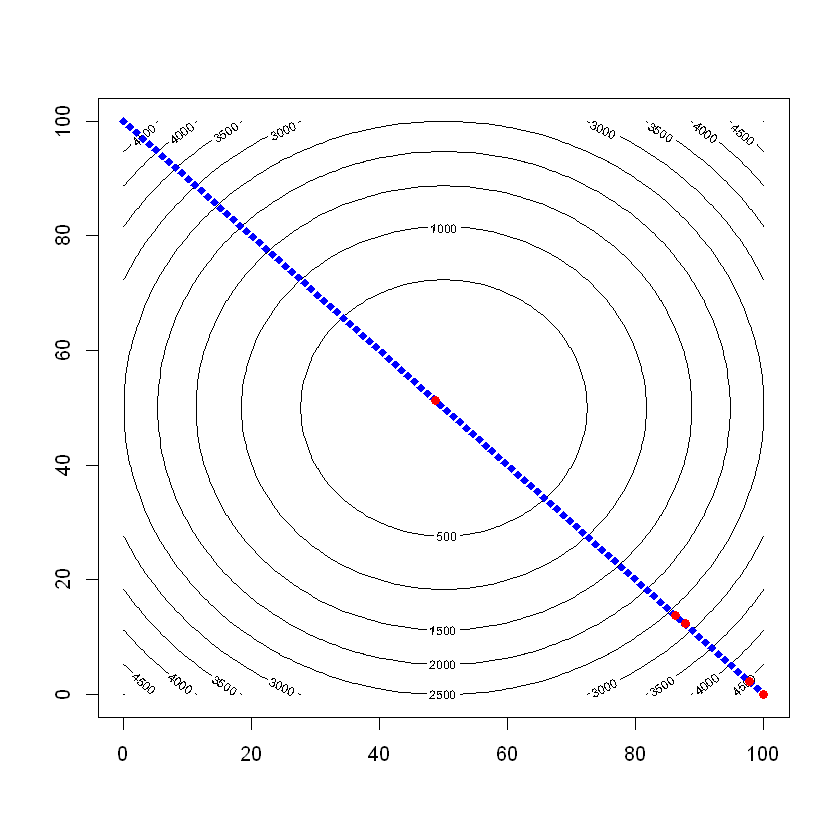

In [26]:
x <- seq(0,100,length.out=100)
y <- sort(100-x)
z <- outer((x-50)^2,(y-50)^2,`+`)

contour(x,y,z,xlim = range(x, finite = TRUE),
        ylim = range(y, finite = TRUE),
        zlim = range(z, finite = TRUE))
lines(x, 100-x, pch=18, col="blue", type="b", lty=2)
points(points_test[,1],points_test[,2], pch=19, col="red")

In [28]:
data_updated

,resp,x,y
,<dbl>,<dbl>,<dbl>
40,4973.8003536,0.1311703,99.868830
35,2044.7191652,18.0256418,81.974358
97,2742.4263992,87.0298960,12.970104
58,3872.3856134,5.9978091,94.002191
48,4009.0023491,5.2283441,94.771656
95,4231.9038222,4.0005227,95.999477
73,920.7120708,71.4559091,28.544091
34,3187.4783130,89.9216627,10.078337
100,0.4662798,49.5171544,50.482846


In [ ]:
fjouet(0.75,99.24)

[1] 9749.65